NN: 230960
NNS: 48541
JJ: 39206
RB: 17030
VBG: 16915
VBN: 14384
VB: 1810
VBD: 665
JJS: 353
IN: 91
DT: 31
VBZ: 30
PRP: 15
JJR: 13
CD: 12
MD: 12
PRP$: 7
CC: 5
WDT: 5
RBR: 4
WRB: 4
WP: 3
VBP: 2
pos_tag: 1
TO: 1
WP$: 1


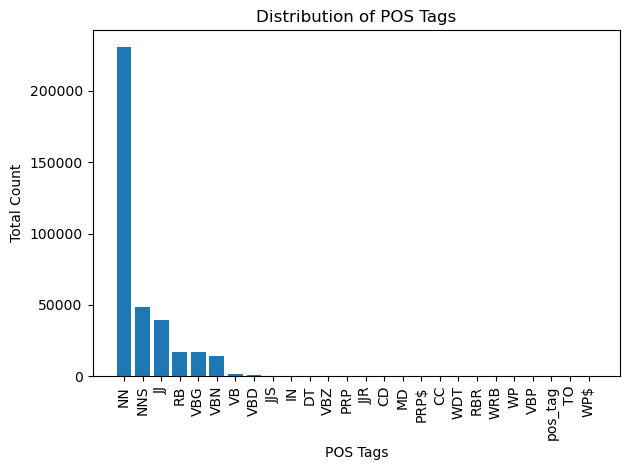

In [6]:
import matplotlib.pyplot as plt

def word_count_mapper(line):
    columns = line.strip().split(',')
    if len(columns) >= 2:  # Make sure there are at least 2 columns (word and pos_tag)
        word = columns[0]
        pos_tag = columns[1]
        # Emit each pos_tag as a key with a count of 1
        return (pos_tag, 1)
    else:
        return None

def word_count_reducer(key, counts):
    # Sum the counts for each pos_tag
    total_count = sum(counts)
    # Emit the pos_tag with its total count
    return (key, total_count)

def main():
    input_file = 'C:\\Users\\DANIEL\\Downloads\\Uni\\Sem 4\\BDA in the Cloud\\word_corpus.csv'

    with open(input_file, 'r') as file:
        # Map phase
        mapped_data = map(word_count_mapper, file)

        # Filter out None values (lines with insufficient columns)
        filtered_mapped_data = filter(lambda x: x is not None, mapped_data)

        # Group data by key (pos_tag) and apply reduce phase
        grouped_data = {}
        for key, value in filtered_mapped_data:
            grouped_data.setdefault(key, []).append(value)

        # Reduce phase
        reduced_data = [word_count_reducer(key, counts) for key, counts in grouped_data.items()]

        # Sort the reduced data by descending order based on the total count
        sorted_data = sorted(reduced_data, key=lambda x: x[1], reverse=True)

        # Output result
        for key, total_count in sorted_data:
            print(f"{key}: {total_count}")

        # Create lists to store the pos_tags and their corresponding total counts
        pos_tags = [key for key, _ in sorted_data]
        total_counts = [total_count for _, total_count in sorted_data]

        # Create a histogram
        plt.bar(pos_tags, total_counts)

        # Tilt the labels along the x-axis by 90 degrees
        plt.xticks(rotation=90)

        # Set labels and title
        plt.xlabel('POS Tags')
        plt.ylabel('Total Count')
        plt.title('Distribution of POS Tags')

        # Show the histogram
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    main()